In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('bank_data_factor_analysis.csv')

In [3]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
# Drop columns that are non-numeric as they require dummy encoding
columns_to_drop = ['Industry', 'Ethnicity', 'Citizen']
data.drop(columns=columns_to_drop, inplace=True)

In [5]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,120,0,1


In [6]:
#Descriptive stats

data.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


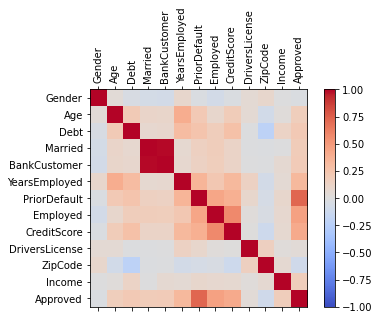

In [7]:
#Display correlation

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

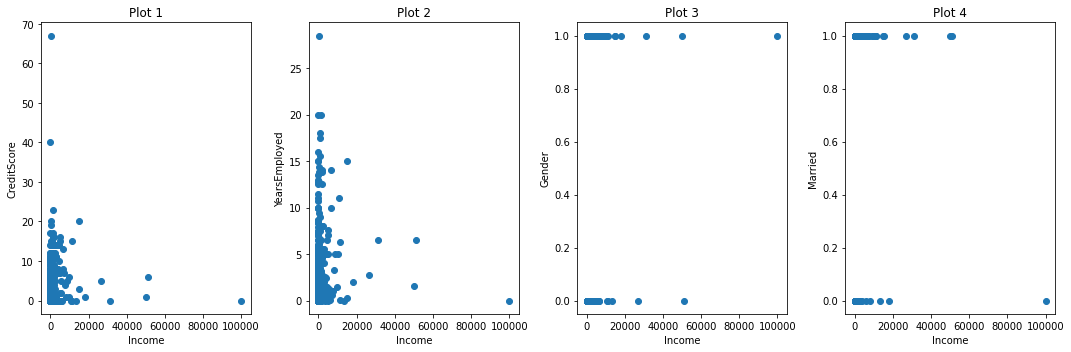

In [8]:
# Create subplots or 2D plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plot scatter plots on each subplot
axes[0].scatter(data.Income, data.CreditScore)
axes[0].set_title('Plot 1')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('CreditScore')

axes[1].scatter(data.Income, data.YearsEmployed)
axes[1].set_title('Plot 2')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('YearsEmployed')

axes[2].scatter(data.Income, data.Gender)
axes[2].set_title('Plot 3')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Gender')

axes[3].scatter(data.Income, data.Married)
axes[3].set_title('Plot 4')
axes[3].set_xlabel('Income')
axes[3].set_ylabel('Married')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [9]:
# import relevant library to display the 3D plot

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

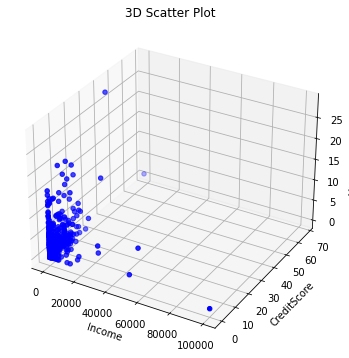

In [10]:
# Create 3D plots

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter plot
ax.scatter(data.Income,data.CreditScore, data.YearsEmployed, c='b', marker='o')

# Set labels and title
ax.set_xlabel('Income')
ax.set_zlabel('YearsEmployed')
ax.set_ylabel('CreditScore')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()

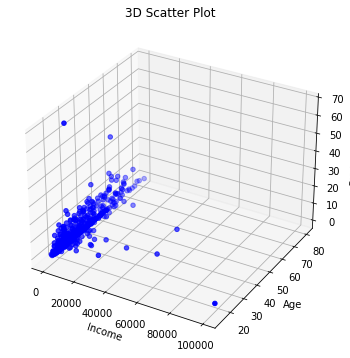

In [11]:
# Create 3D plots

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter plot
ax.scatter(data.Income,data.Age, data.CreditScore, c='b', marker='o')

# Set labels and title
ax.set_xlabel('Income')
ax.set_zlabel('CreditScore')
ax.set_ylabel('Age')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()

In [12]:
# Import library to transform the data

from sklearn.preprocessing import StandardScaler

In [13]:
import sklearn
print (sklearn.__version__) # this causes the problem!

1.3.2


In [14]:
from sklearn.decomposition import PCA

In [15]:
# Principal Component Analysis

X_std = StandardScaler().fit_transform(data)

In [16]:
pca = PCA(n_components = 5)
x_pca = pca.fit(X_std)

In [17]:
x_pca.explained_variance_ratio_

array([0.24754196, 0.14075609, 0.09803289, 0.09411135, 0.07771158])

In [18]:
x_pca.explained_variance_ratio_.sum()

0.6581538754197898

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [20]:
#Heirarchichal cluster

Z = linkage(data, 'ward')
plt.figure(figsize=(500, 50))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()